# 2.4 Evaluating Hyperparameters - Heathrow

## Contents:

1. Import Libraries
2. Import Datasets
3. Data Wrangling
4. Reshaping the Model
5. Data Split
6. Hyperparameter Optimisation - Grid Search
7. Random Search
8. Running Random Forest with Optimised Search Parameters
9. Uncovering Feature Importances

## 1. Import Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import time
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)

## 2. Import Datasets

In [4]:
# Define path to dataset
path = r'/Users/analazarevska/Documents/CAREER FOUNDRY/Data Analytics Program/Machine Learning/A1, Basics of Machine Learning for Analysts/ClimateWins/'

# Import dataset
df = pd.read_csv(os.path.join(path, 'Data Sets', 'df_cleaned_with_date.csv'))
df_pleasant = pd.read_csv(os.path.join(path, 'Data Sets', 'df_pleasant_with_date.csv'))

In [287]:
df.shape

(22950, 137)

In [288]:
df_pleasant.shape

(22950, 16)

## 3. Data Wrangling

In [5]:
# Filter the data for Heathrow
list_heathrow = list(x for x in df.columns if x.find('HEATHROW') >=0)

# Create a dataframe with those columns
df_heathrow = df[list_heathrow]
df_heathrow

,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max
0,7,0.91,1.0010,0.13,0.22,0.0,10.6,9.4,8.3
1,7,0.98,1.0051,0.13,0.23,0.0,6.1,3.9,10.6
2,8,0.96,1.0166,0.15,0.07,0.1,8.4,6.1,12.2
3,8,0.98,1.0230,0.13,0.00,0.0,9.4,6.7,8.9
4,5,0.84,1.0275,0.30,0.00,2.1,8.9,8.9,7.2
...,...,...,...,...,...,...,...,...,...
22945,5,0.87,1.0140,1.18,0.16,1.9,16.4,11.9,18.9
22946,4,0.82,1.0152,1.18,0.16,4.2,15.8,12.7,21.8
22947,7,0.85,1.0138,1.18,0.16,4.2,16.5,11.2,17.0
22948,5,0.86,1.0147,1.18,0.16,0.6,15.2,13.4,17.5


In [9]:
# Filter data for Heathrow in df_pleasant
pleasant_list_heathrow = df_pleasant['HEATHROW_pleasant_weather']
pleasant_list_heathrow

0        0
1        0
2        0
3        0
4        0
        ..
22945    0
22946    0
22947    0
22948    0
22949    0
Name: HEATHROW_pleasant_weather, Length: 22950, dtype: int64

In [11]:
df_heathrow.shape

(22950, 9)

In [13]:
pleasant_list_heathrow.shape

(22950,)

## 4. Reshaping the Model

In [15]:
X = df_heathrow

In [17]:
y = pleasant_list_heathrow

In [19]:
# Turn X and y from a df to arrays
X = np.array(X)
y = np.array(y)

In [298]:
# Turn X and y from a df to arrays

X = np.array(X)
y = np.array(y)

In [21]:
X.shape

(22950, 9)

In [23]:
y.shape

(22950,)

## 5. Data Split

In [25]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [27]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


## 6. Hyperparameter Optimisation - Grid Search

In [29]:
# Create a RF classifier
clf = RandomForestClassifier()  

In [31]:
# Grid search cv
grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200],
              'max_features':[1,3,5,7],
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[1,2,3]
           }

In [33]:
start = time.time()
grid = GridSearchCV(clf, param_grid=grid_space, cv=3, scoring='accuracy', verbose=3, n_jobs=-1)
model_grid = grid.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=200;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=10;, score=0.909 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=0.954 total time=   0.3s
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 2/3] END max_de

In [35]:
# Print grid search results

print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

Best GRID search hyperparameters are: {'max_depth': 3, 'max_features': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best GRID search score is: 1.0


## 7. Random Search

In [37]:
# Define random search cv

rs_space={'max_depth':list(np.arange(10, 100, step=10)) + [None],
              'n_estimators':np.arange(10, 500, step=50),
              'max_features':randint(1,7),
              'criterion':['gini','entropy'],
              'min_samples_leaf':randint(1,4),
              'min_samples_split':np.arange(2, 10, step=2)
         }

In [39]:
# Create a RF classifier

clf2= RandomForestClassifier()

In [41]:
start = time.time()
rf_random = RandomizedSearchCV(clf2, rs_space, n_iter=200, scoring='accuracy', verbose=3, n_jobs=-1, cv=3)
model_random = rf_random.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 200 candidates, totalling 600 fits
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.952 total time=   0.6s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.952 total time=   0.6s
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=3, min_samples_split=3, n_estimators=10;, score=0.976 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=3, min_samples_split=3, n_estimators=10;, score=0.926 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=3, min_samples_split=3, n_estimators=10;, score=0.900 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=0.956 total time=   0.3s
[CV 2/3] EN

In [43]:
# Random random search results

print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best RANDOM search hyperparameters are: {'criterion': 'gini', 'max_depth': 70, 'max_features': 6, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 360}
Best RANDOM search score is: 1.0


In [45]:
# Grid search results vs.

print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

# Random random search results

print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best GRID search hyperparameters are: {'max_depth': 3, 'max_features': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best GRID search score is: 1.0
Best RANDOM search hyperparameters are: {'criterion': 'gini', 'max_depth': 70, 'max_features': 6, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 360}
Best RANDOM search score is: 1.0


## 8. Running Random Forest with Optimised Search Parameters

In [47]:
# Create a RF classifier with the RANDOM search results
clf3 = RandomForestClassifier(n_estimators = 110, max_depth=60, max_features=6, min_samples_leaf=3, min_samples_split=4, criterion = 'gini')  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf3.fit(X_train, y_train)

RandomForestClassifier(max_depth=60, max_features=6, min_samples_leaf=3,
                       min_samples_split=4, n_estimators=110)

In [49]:
# Perform predictions on the test dataset
y_pred3 = clf3.predict(X_test)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred3))

Model Accuracy:  1.0


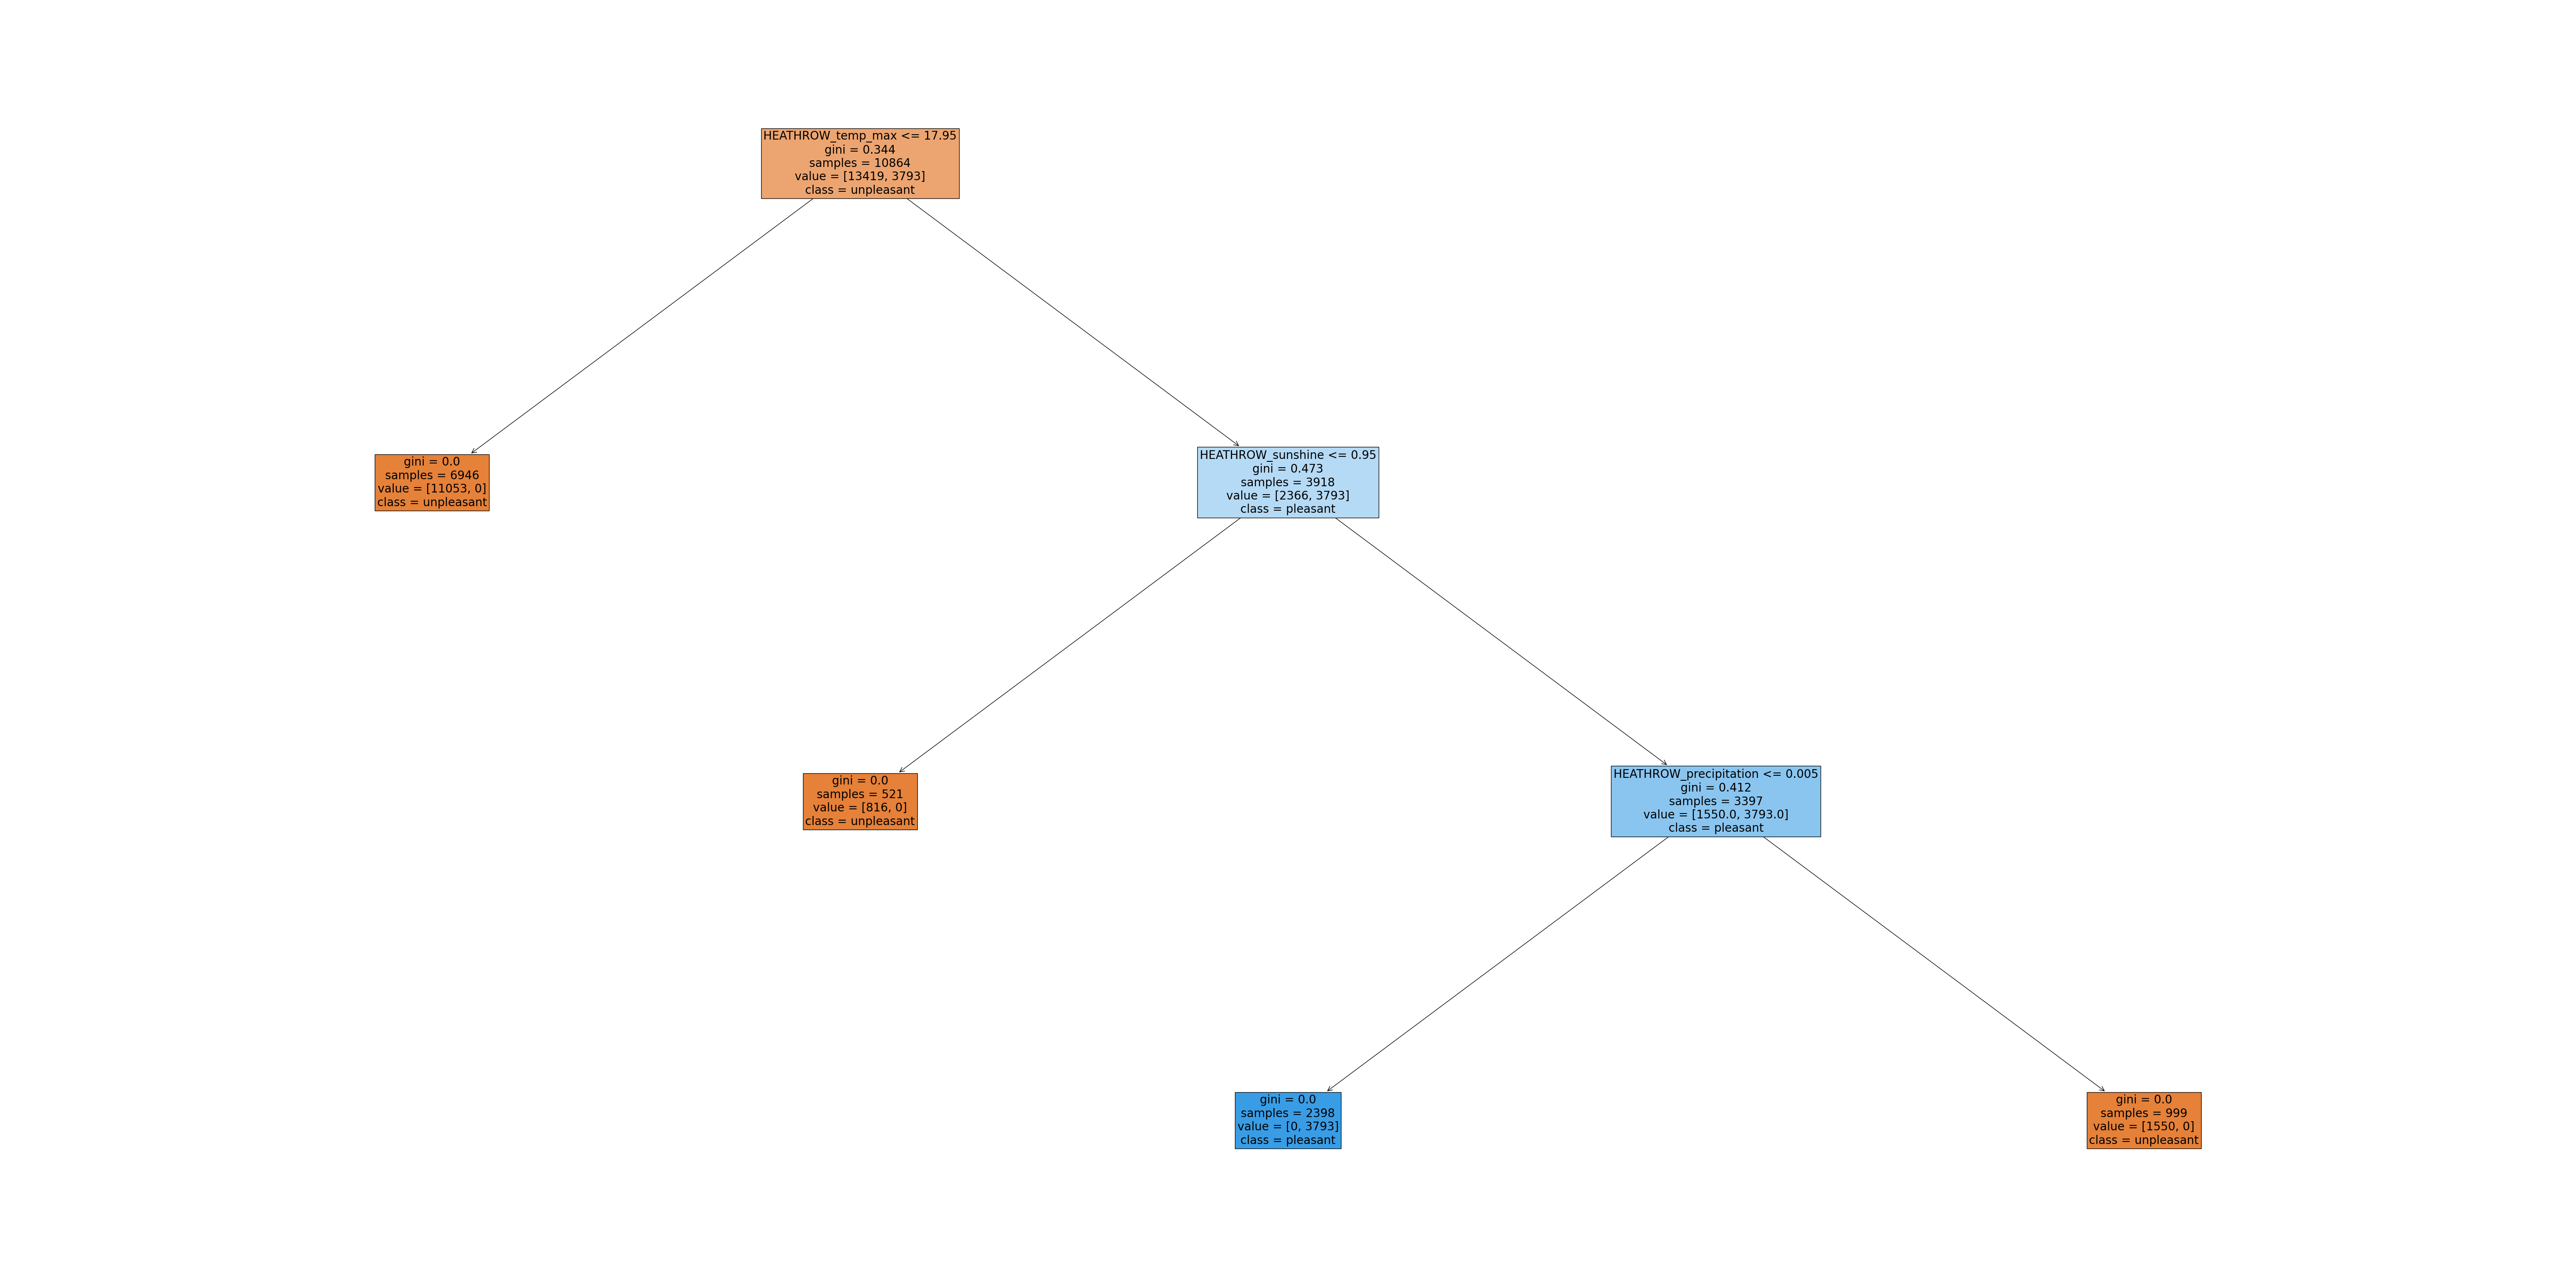

In [51]:
# Plot a tree from the selected random forest
# Class-names = {0:'Unpleasant Weather', 1:'Pleasant Weather'}

fig = plt.figure(figsize=(80,40))
plot_tree(clf3.estimators_[6], fontsize = 20, feature_names = df_heathrow.columns, class_names=['unpleasant', 'pleasant'], filled=True);

In [53]:
fig.savefig(os.path.join(path, 'Visualisations', 'optimised_random_forest_Heathrow.png'),bbox_inches='tight')

## 9. Uncovering Feature Importances

In [55]:
# Retrieve feature importances from the trained model

newarray = clf3.feature_importances_
print(clf3.feature_importances_.shape)
newarray

(9,)


array([2.32870849e-03, 1.37676486e-02, 9.76844429e-03, 4.11965309e-02,
       3.66321449e-01, 8.24315528e-02, 7.11676719e-02, 8.93146683e-05,
       4.12928679e-01])

In [59]:
# Create a list of weather features

wx_list = [feature.replace('HEATHROW_', '') for feature in df_heathrow]
wx_list

['cloud_cover',
 'humidity',
 'pressure',
 'global_radiation',
 'precipitation',
 'sunshine',
 'temp_mean',
 'temp_min',
 'temp_max']

In [61]:
important = pd.Series(newarray, index = wx_list)
important

cloud_cover         0.002329
humidity            0.013768
pressure            0.009768
global_radiation    0.041197
precipitation       0.366321
sunshine            0.082432
temp_mean           0.071168
temp_min            0.000089
temp_max            0.412929
dtype: float64

['cloud_cover', 'humidity', 'pressure', 'global_radiation', 'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max']


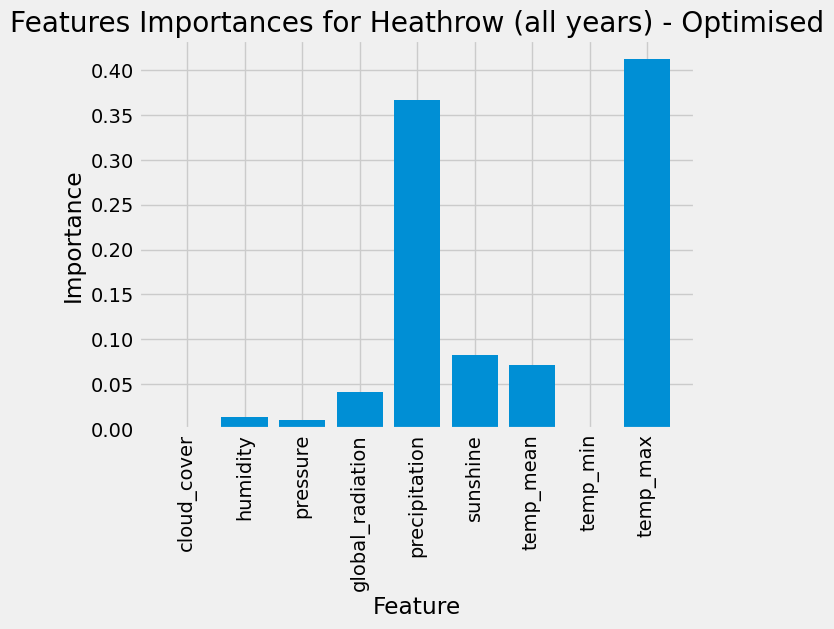

In [65]:
# Plot the results

%matplotlib inline

plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(newarray)))
print(wx_list)

plt.bar(x_values, newarray, orientation = 'vertical')
plt.xticks(x_values, wx_list, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Feature'); plt.title('Features Importances for Heathrow (all years) - Optimised');

plt.savefig(os.path.join(path, 'Visualisations', 'Heathrow_feature_importances_optimised.png'), bbox_inches='tight')
plt.show()